/tmp/ipykernel_890662/3094451889.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Authentic', 'Ambiguous', 'Missing'], fontsize=12, fontweight='bold')


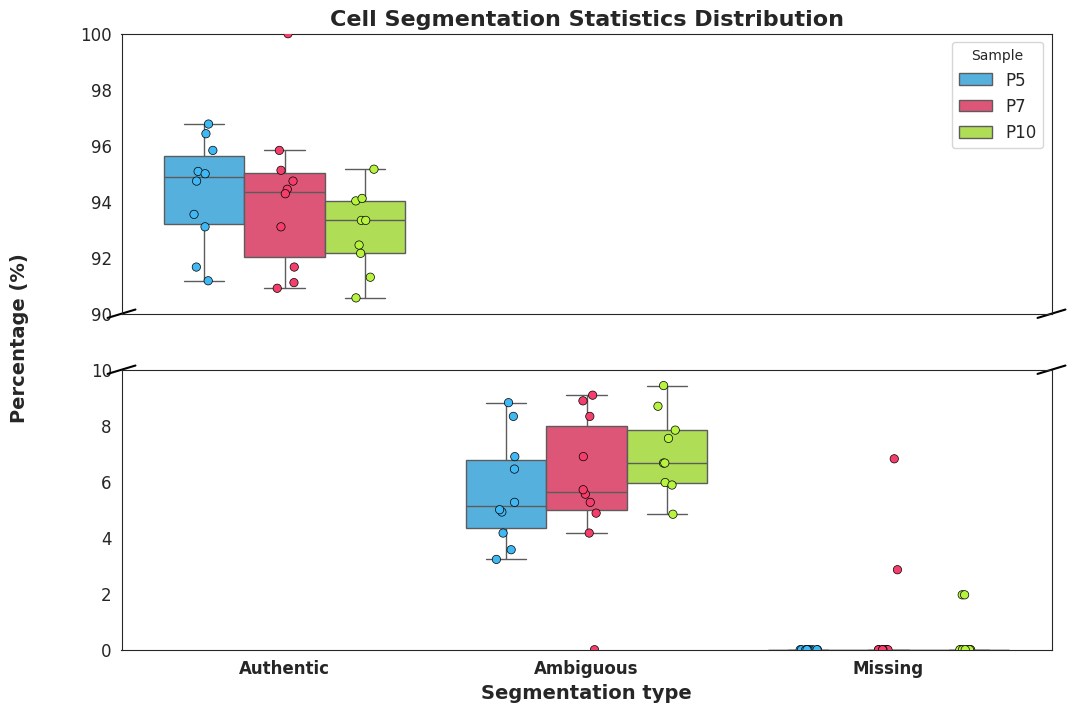

Cell Segmentation Statistics by Round:

P5:
Round | Real | Authentic | Missing | Ambiguous | Auth% | Amb% | Miss%
---------------------------------------------------------------------------
   1  |   31 |      30   |      0   |        1    |  96.8 |  3.2 |  0.0
   2  |   24 |      22   |      0   |        2    |  91.7 |  8.3 |  0.0
   3  |   29 |      27   |      0   |        2    |  93.1 |  6.9 |  0.0
   4  |   31 |      29   |      0   |        2    |  93.5 |  6.5 |  0.0
   5  |   61 |      58   |      0   |        3    |  95.1 |  4.9 |  0.0
   6  |   38 |      36   |      0   |        2    |  94.7 |  5.3 |  0.0
   7  |   28 |      27   |      0   |        1    |  96.4 |  3.6 |  0.0
   8  |   20 |      19   |      0   |        1    |  95.0 |  5.0 |  0.0
   9  |   24 |      23   |      0   |        1    |  95.8 |  4.2 |  0.0
  10  |   34 |      31   |      0   |        3    |  91.2 |  8.8 |  0.0

P7:
Round | Real | Authentic | Missing | Ambiguous | Auth% | Amb% | Miss%
---------------

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 数据输入
data = {
    'P5': {
        'real': [31, 24, 29, 31, 61, 38, 28, 20, 24, 34],
        'authentic': [30, 22, 27, 29, 58, 36, 27, 19, 23, 31],
        'missing': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    },
    'P7': {
        'real': [48, 44, 45, 36, 24, 29, 19, 35, 21, 41],
        'authentic': [44, 40, 41, 34, 23, 27, 18, 33, 21, 39],
        'missing': [0, 3, 0, 0, 0, 0, 0, 1, 0, 0]
    },
    'P10': {
        'real': [75, 67, 48, 62, 53, 53, 45, 46, 51, 51],
        'authentic': [70, 63, 43, 59, 48, 49, 42, 42, 48, 47],
        'missing': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
    }
}

# 计算每轮的百分比数据
plot_data = []
for sample in data.keys():
    for i in range(10):
        real_count = data[sample]['real'][i]
        authentic_count = data[sample]['authentic'][i]
        missing_count = data[sample]['missing'][i]
        ambiguous_count = real_count - authentic_count
        
        # 计算百分比
        authentic_pct = (authentic_count / real_count) * 100
        ambiguous_pct = (ambiguous_count / real_count) * 100
        missing_pct = (missing_count / real_count) * 100
        
        # 添加到绘图数据
        plot_data.append({'Sample': sample, 'Category': 'Authentic', 'Percentage': authentic_pct})
        plot_data.append({'Sample': sample, 'Category': 'Ambiguous', 'Percentage': ambiguous_pct})
        plot_data.append({'Sample': sample, 'Category': 'Missing', 'Percentage': missing_pct})

# 转换为DataFrame
df = pd.DataFrame(plot_data)

fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 创建颜色映射
colors = ['#3fb8f4', "#f43f6c", '#b8f43f']  # P5绿色、P7蓝色、P10橙色
sample_colors = dict(zip(['P5', 'P7', 'P10'], colors))

# 上半部分：90-100%
upper_df = df[df['Percentage'] >= 90]
if not upper_df.empty:
    sns.boxplot(data=upper_df, x='Category', y='Percentage', hue='Sample', 
                palette=sample_colors, showfliers=False, ax=ax2)
    sns.stripplot(data=upper_df, x='Category', y='Percentage', hue='Sample', 
                  palette=sample_colors, dodge=True, size=6, alpha=1, ax=ax2, edgecolor='black', linewidth=0.5)

# 下半部分：0-10%
lower_df = df[df['Percentage'] <= 10]
if not lower_df.empty:
    sns.boxplot(data=lower_df, x='Category', y='Percentage', hue='Sample', 
                palette=sample_colors, showfliers=False, ax=ax1)
    sns.stripplot(data=lower_df, x='Category', y='Percentage', hue='Sample', 
                  palette=sample_colors, dodge=True, size=6, alpha=1, ax=ax1, edgecolor='black', linewidth=0.5)

# 设置y轴范围
ax2.set_ylim(90, 100)  # 上半部分
ax1.set_ylim(0, 10)    # 下半部分

# 隐藏上半部分的x轴标签
ax2.set_xlabel('')
ax2.set_xticklabels([])

# 移除下半部分的图例
if ax1.get_legend():
    ax1.get_legend().remove()

# 设置上半部分的图例在右上角
handles, labels = ax2.get_legend_handles_labels()
if len(handles) > 0:
    ax2.legend(handles[:3], labels[:3], fontsize=12, loc='upper right', title='Sample')

# 设置标签
ax1.set_xlabel('Segmentation type', fontsize=14, fontweight='bold')
ax1.set_ylabel('')  # 暂时清空
ax2.set_ylabel('')  # 暂时清空

# 设置x轴标签
ax1.set_xticklabels(['Authentic', 'Ambiguous', 'Missing'], fontsize=12, fontweight='bold')

# 设置标题
ax2.set_title('Cell Segmentation Statistics Distribution', fontsize=16, fontweight='bold')

# 设置字体大小
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

# 在整个图的左侧居中添加Y轴标签
fig.text(0.04, 0.5, 'Percentage (%)', va='center', ha='center', rotation='vertical', 
         fontsize=14, fontweight='bold')

# 添加断轴标记
d = .015  # 断轴线的大小
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # 左上
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 右上

kwargs.update(transform=ax1.transAxes)
ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 左下
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 右下

# 调整子图间距和布局
# plt.subplots_adjust(hspace=0.05, left=0.1)

# 保存图片为600dpi的PNG格式
plt.savefig('cell_segmentation_boxplot.pdf', dpi=300, bbox_inches='tight', facecolor='white')

# 显示图形
plt.show()

# 打印详细统计信息
print("Cell Segmentation Statistics by Round:")
print("=" * 80)
for sample in ['P5', 'P7', 'P10']:
    print(f"\n{sample}:")
    print("Round | Real | Authentic | Missing | Ambiguous | Auth% | Amb% | Miss%")
    print("-" * 75)
    for i in range(10):
        real_count = data[sample]['real'][i]
        authentic_count = data[sample]['authentic'][i]
        missing_count = data[sample]['missing'][i]
        ambiguous_count = real_count - authentic_count
        
        auth_pct = (authentic_count / real_count) * 100
        amb_pct = (ambiguous_count / real_count) * 100
        miss_pct = (missing_count / real_count) * 100
        
        print(f"  {i+1:2d}  | {real_count:4d} |    {authentic_count:4d}   |   {missing_count:4d}   |     {ambiguous_count:4d}    | {auth_pct:5.1f} | {amb_pct:4.1f} | {miss_pct:4.1f}")